In [ ]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

# Extraindo os dados e criando um DataFrame
X = iris.data  # Características (features)
y = iris.target  # Classes (target)
feature_names = iris.feature_names
target_names = iris.target_names

# Criando um DataFrame para melhor visualização
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

# Visualizando as primeiras linhas do dataset
print("Primeiras linhas do dataset Iris:")
print(df.head())

Primeiras linhas do dataset Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [16]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

print(iris_df.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [4]:
estatisticas_por_especie = iris_df.groupby('species').describe()
print(estatisticas_por_especie)

           sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
sp

In [5]:
contagem_classes = iris_df ['species'].value_counts()
print(contagem_classes)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=iris_df,
    x="largura das petalas (cm)",
    y="altura das petalas (cm)",
    hue="species",
    palette="viridis",
    s=70
)

plt.title("Relação entre Comprimento e Largura")
plt.show()



ValueError: Could not interpret value `largura das petalas (cm)` for `x`. An entry with this name does not appear in `data`.

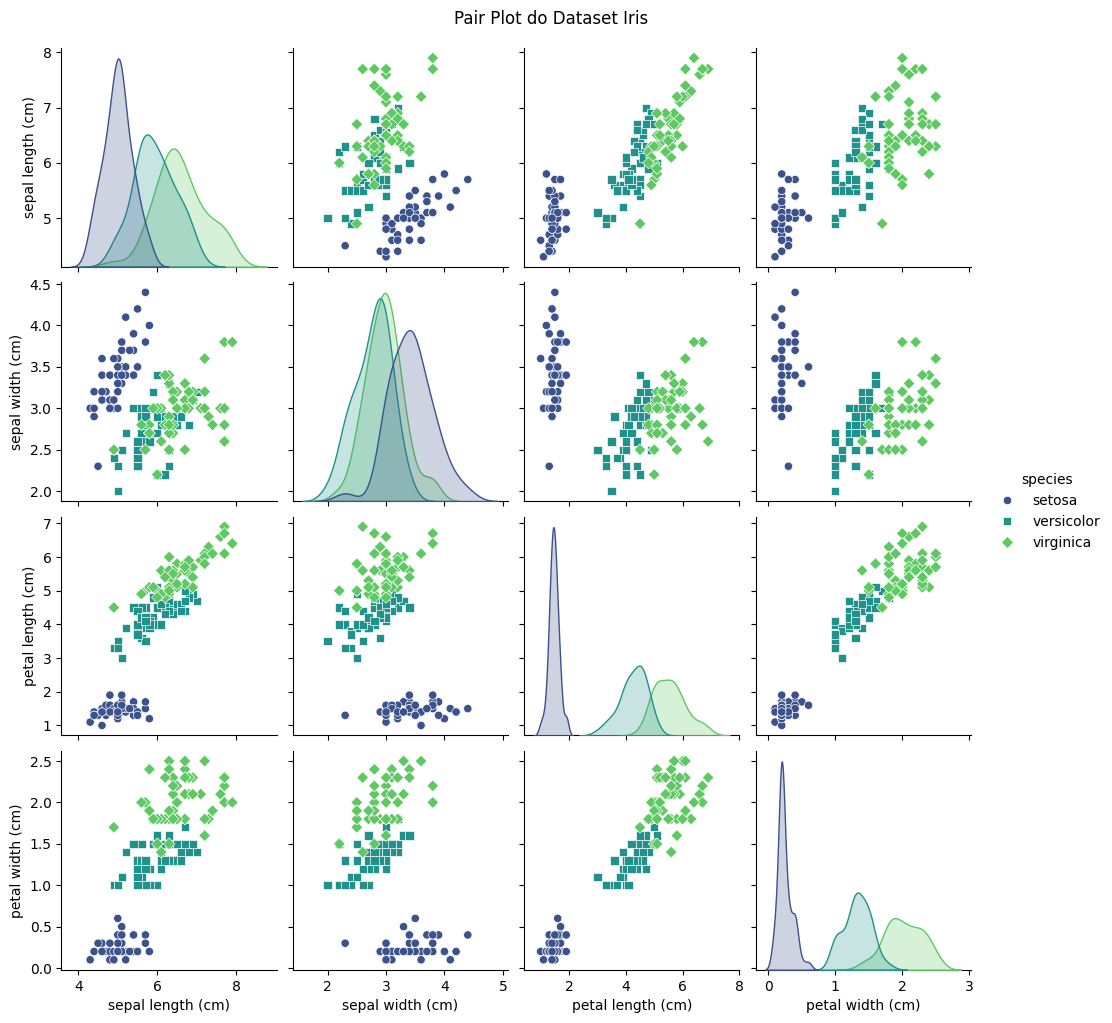

In [11]:
sns.pairplot(iris_df, hue="species", palette="viridis", markers=["o", "s", "D"])
plt.suptitle("Pair Plot do Dataset Iris", y=1.02)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np


iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['species'] = target_names[y]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  
    random_state=42,  
    stratify=y
)

print("Distribuição no conjunto original:", np.bincount(y))
print("Distribuição no treino:", np.bincount(y_train))
print("Distribuição no teste:", np.bincount(y_test))




Distribuição no conjunto original: [50 50 50]
Distribuição no treino: [35 35 35]
Distribuição no teste: [15 15 15]


In [19]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)  # Sem padronização necessária
print("Acurácia da Random Forest:", model_rf.score(X_test, y_test))

Acurácia da Random Forest: 0.8888888888888888


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

NameError: name 'y_pred' is not defined